In [13]:
from ..survey import SurveyReader
from ..reporter import Reporter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = "../ENAHO/"

survey = SurveyReader(DATA_DIR)#, exclude_years={"2010", "2011"})
survey.read_files()
reporter = Reporter(survey)
yearly_modules = reporter.yearly_modules()
yearly_cols = reporter.modules_dims("cols")
filenames = reporter.all_filenames()

In [66]:
q_names = [
    "P501", 
    "P510", 
    "P5111",
    "P5112",
    "P5113",
    "P5114",
    "P5115",
    "P5116",
    "P51112", 
    "P5111",
    "P523",
    "P524A1",  # Total income
    "P5295A",
    "P5295B",
    "P5295C",
]
col = survey.data_columns("05", q_names).sample(50000)

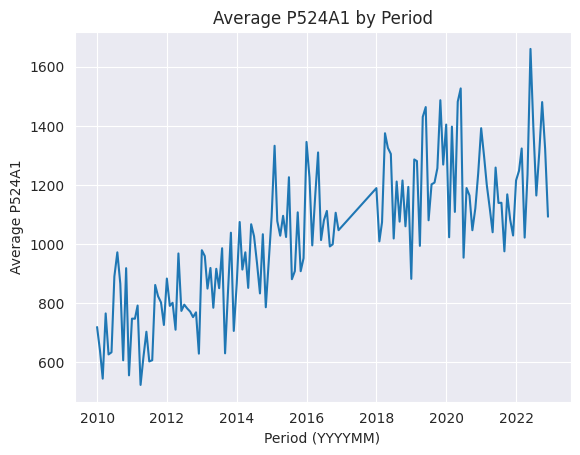

In [109]:
col["period"] = col["AÑO"]+col["MES"]
income = col[col['P524A1'].notna()]
average_by_period = income.groupby(['period'])['P524A1'].mean()
average_by_period.index = pd.to_datetime(average_by_period.index, format='%Y%m')
income = average_by_period.to_frame()
# Create a time series plot
sns.lineplot(x=average_by_period.index, y=average_by_period.values)
plt.xlabel('Period (YYYYMM)')
plt.ylabel('Average P524A1')
plt.title('Average P524A1 by Period')
plt.show()

<Axes: xlabel='period', ylabel='P524A1'>

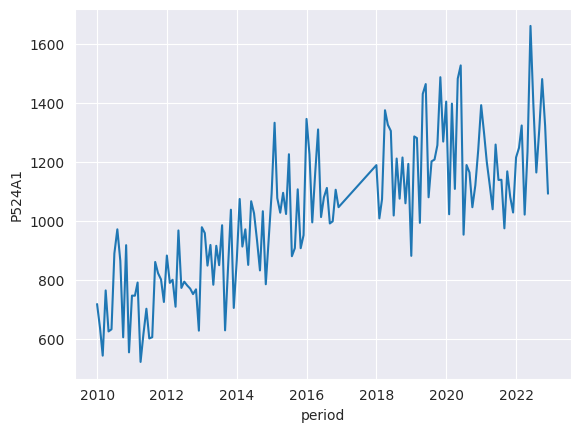

In [68]:
sns.lineplot(data=income, x="period", y="P524A1")

In [69]:
income

,P524A1
period,
2010-01-01,718.671233
2010-02-01,637.500000
2010-03-01,544.030769
2010-04-01,764.876543
2010-05-01,626.028169
...,...
2022-08-01,1164.086957
2022-09-01,1310.450450
2022-10-01,1480.370000


In [113]:
len(col[col["period"]=="201801"]["P524A1"])

415

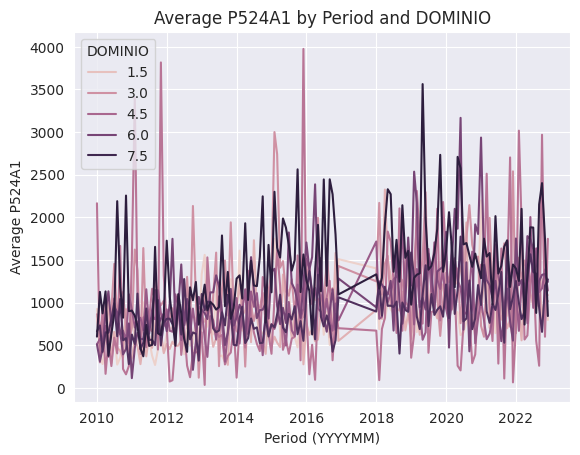

In [140]:
average_by_period_dominio = col.groupby(['period', "DOMINIO"])['P524A1'].mean()
x = [pd.to_datetime(level, format='%Y%m') for level in average_by_period_dominio.index.levels[0]]
levels = [x, average_by_period_dominio.index.levels[1]]
# Convert the period index to datetime format (assuming YYYYMM format)
average_by_period_dominio.index = average_by_period_dominio.index.set_levels(levels)
 
# # Reshape the Series to a long format for seaborn plot
df_plot = average_by_period_dominio.to_frame(name='P524A1').reset_index()
# 
# # Create the time series plot
sns.lineplot(x='period', y='P524A1', hue='DOMINIO', data=df_plot)
# 
# # Customize the plot (optional)
plt.xlabel('Period (YYYYMM)')
plt.ylabel('Average P524A1')
plt.title('Average P524A1 by Period and DOMINIO')
plt.show()

# df_plot = pd.melt(df_plot, id_vars='DOMINIO', var_name='period', value_name='P524A1')

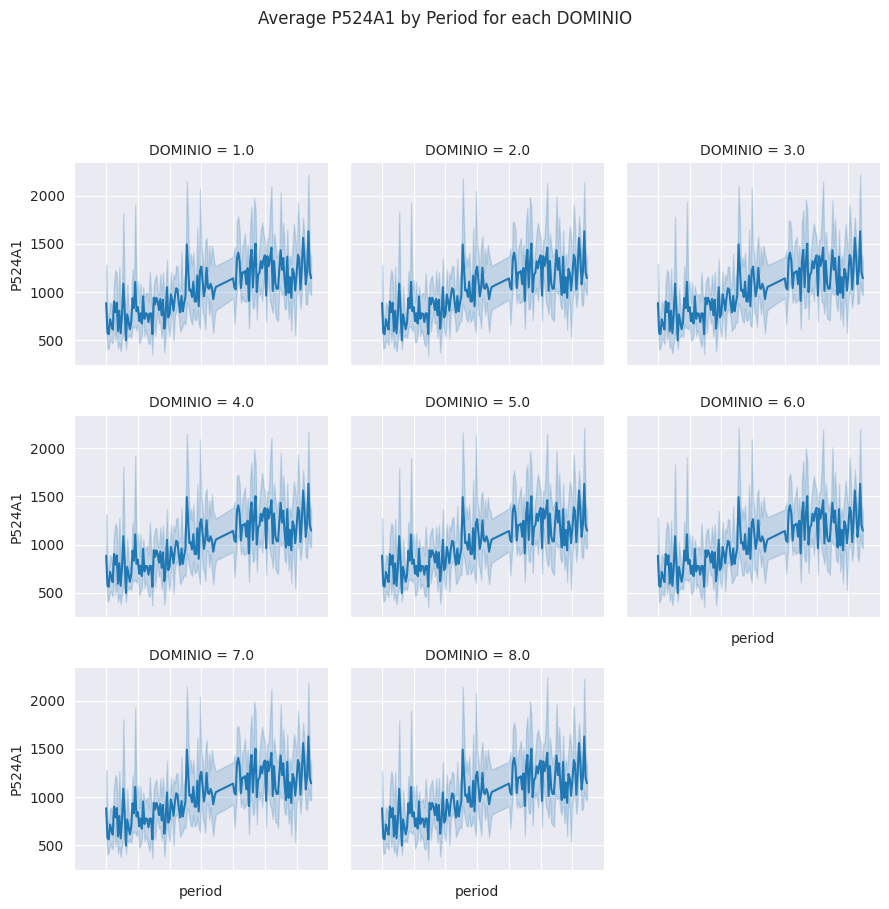

In [136]:
g = sns.FacetGrid(df_plot, col='DOMINIO', col_wrap=3)  # Adjust col_wrap for more DOMINIO values
# 
# # Create time series plot on each facet
g.map(sns.lineplot, x='period', y='P524A1', data=df_plot)
# 
# # Customize the plot (optional)
g.fig.suptitle('Average P524A1 by Period for each DOMINIO', y=1.02)  # Set common title
g.fig.subplots_adjust(top=0.85)  # Adjust spacing to prevent title cutoff
g.set_xticklabels(rotation=45)  # Rotate x-axis labels for readability
plt.show()